# <u> <b> LDA Topic Modelling 

### 1. Loading and Cleaning of Data

In [2]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv(r'C:\Users\damar\Desktop\redditdataset.csv')
# Print head
papers.head()

,score,id,ups,downs,num_comments,permalink,text,link_flair_text,edited,name
0,102892,1464ghff,7994600,131,1002,http://www.reddit.com,It was so nice throwing big parties taylor swi...,NO,1611870579,t3_1hxdkd
1,9552,84gfghfg,3564,65,1558,http://www.reddit.com,This post goes way in depth to Prometheus and ...,NO,1611870579,t3_1bn9h4
2,8921,943hgjg,8644,58,466,http://www.reddit.com,Life isn't fair. My mother always told me that...,NO,1611870579,t3_1kakz
3,65646,686gfhgf,7982,69,8552,http://www.reddit.com,I was the lucky one in my family. In 2008 I w...,YES,1611870579,t3_1bn9h4
4,9641,93hgh,3356,38,4522,http://www.reddit.com,Three Idiots’ is a remarkable ahead of its tim...,Explained,1611870579,t3_16rnfn


In [3]:
# Remove the columns
papers = papers.drop(columns=['ups','downs','num_comments','permalink','link_flair_text','edited','name'], axis=1).sample(10)
# Print out the first rows of papers
papers.head()

,score,id,text
7,7453,63hjh,I still remember when I first joined and most ...
6,4562,897jn,"Mileage doesn't mean much, look at the brake p..."
11,7743,369ffg,About a month ago ago I decided I wanted to cl...
3,65646,686gfhgf,I was the lucky one in my family. In 2008 I w...
16,8520,300po,Suppose all fellow retard shareholders of GME ...


In [4]:
# Load the regular expression library
import re
# Remove punctuation
papers['text_processed'] = \
papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['text_processed'] = \
papers['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['text_processed'].head()

7     i still remember when i first joined and most ...
6     mileage doesn't mean much look at the brake pe...
11    about a month ago ago i decided i wanted to cl...
3     i was the lucky one in my family  in 2008 i wa...
16    suppose all fellow retard shareholders of gme ...
Name: text_processed, dtype: object

### 2. Exploratory Analysis

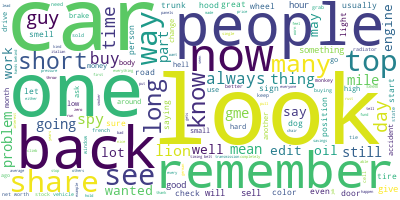

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000,
contour_width=5, contour_color='red')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### 3. Preparation for LDA Modelling

In [6]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'is', 'are', 'they', 'am','us','i','you','https','the','a','ðys','gme','like','look','always'])
def sent_to_words(sentences):
 for sentence in sentences:
     yield(gensim.utils.simple_preprocess(str(sentence),deacc=True)) # deacc=True removes punctuations
def remove_stopwords(texts):
 return [[word for word in simple_preprocess(str(doc))
if word not in stop_words] for doc in texts]
data = papers.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\damar\AppData\Roaming\nltk_data...


['still', 'remember', 'first', 'joined', 'people', 'going', 'binary', 'options', 'trades', 'things', 'trial', 'results', 'positive', 'negative', 'pharmaceutical', 'company', 'back', 'penny', 'stocks', 'rules', 'days', 'delisted', 'tickers', 'omvs', 'others', 'know', 'lot', 'million', 'past', 'couple']


[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:20])


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


### 4. LDA Model Training

In [8]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
id2word=id2word,
num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"shares" + 0.009*"sell" + 0.008*"short" + 0.007*"person" + '
  '0.006*"net" + 0.006*"one" + 0.006*"long" + 0.006*"worth" + 0.005*"sold" + '
  '0.005*"share"'),
 (1,
  '0.024*"lion" + 0.015*"dog" + 0.012*"says" + 0.011*"monkey" + 0.009*"starts" '
  '+ 0.009*"sees" + 0.008*"car" + 0.007*"could" + 0.007*"another" + '
  '0.007*"get"'),
 (2,
  '0.009*"car" + 0.007*"could" + 0.006*"cars" + 0.005*"many" + 0.005*"people" '
  '+ 0.005*"problem" + 0.004*"way" + 0.004*"may" + 0.004*"things" + '
  '0.004*"going"'),
 (3,
  '0.009*"could" + 0.007*"spy" + 0.007*"one" + 0.007*"back" + 0.006*"shares" + '
  '0.005*"car" + 0.005*"hours" + 0.005*"french" + 0.005*"get" + 0.005*"hands"'),
 (4,
  '0.006*"remember" + 0.005*"one" + 0.005*"people" + 0.005*"could" + '
  '0.004*"car" + 0.004*"still" + 0.004*"way" + 0.004*"time" + 0.004*"many" + '
  '0.004*"well"'),
 (5,
  '0.007*"know" + 0.007*"could" + 0.006*"would" + 0.006*"one" + 0.006*"top" + '
  '0.006*"car" + 0.006*"edit" + 0.006*"many" + 0.00

### 5. Analyzing LDA Model

In [9]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(r'C:\Users\damar\Desktop\lda'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
 LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
 pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
 LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, r'C:\Users\damar\Desktop\lda'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\damar\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.098169  0.011339       1        1  25.483100
7     -0.001159 -0.006099       2        1  24.221404
1     -0.074115 -0.026665       3        1  13.055427
0     -0.007102 -0.011190       4        1  12.771693
5      0.005323 -0.018492       5        1  11.079878
8     -0.026463  0.086988       6        1   6.546719
6      0.005416 -0.048596       7        1   4.423366
3     -0.019931  0.022155       8        1   2.296148
2     -0.005282 -0.005476       9        1   0.061132
4      0.025144 -0.003965      10        1   0.061132, topic_info=          Term       Freq      Total Category  logprob  loglift
148        car   9.000000   9.000000  Default  30.0000  30.0000
72    remember   9.000000   9.000000  Default  29.0000  29.0000
179      could   8.000000   8.000000  Default  28.0000  28.0000
60      people   9.000000   9.000000  Default  27.0000  27.0000
55         one  10.000000  10.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
1         back   0.003069   6.877794  Topic10  -5.7674  -0.3148
238        get   0.003115   7.572723  Topic10  -5.7526  -0.3963
317        may   0.002506   4.991109  Topic10  -5.9700  -0.1968
170      color   0.002388   4.044126  Topic10  -6.0182  -0.0346
428  something   0.002418   4.613010  Topic10  -6.0056  -0.1536

[556 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
101       1  0.376798      able
101       2  0.376798      able
850       3  0.769047  abruptly
103       1  0.291470  accident
103       2  0.291470  accident
...     ...       ...       ...
495       4  0.273171     would
495       5  0.273171     would
497       2  0.725968  wrangler
100       1  0.662464     years
500       2  0.490245       yes

[432 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 2, 1, 6, 9, 7, 4, 3, 5])

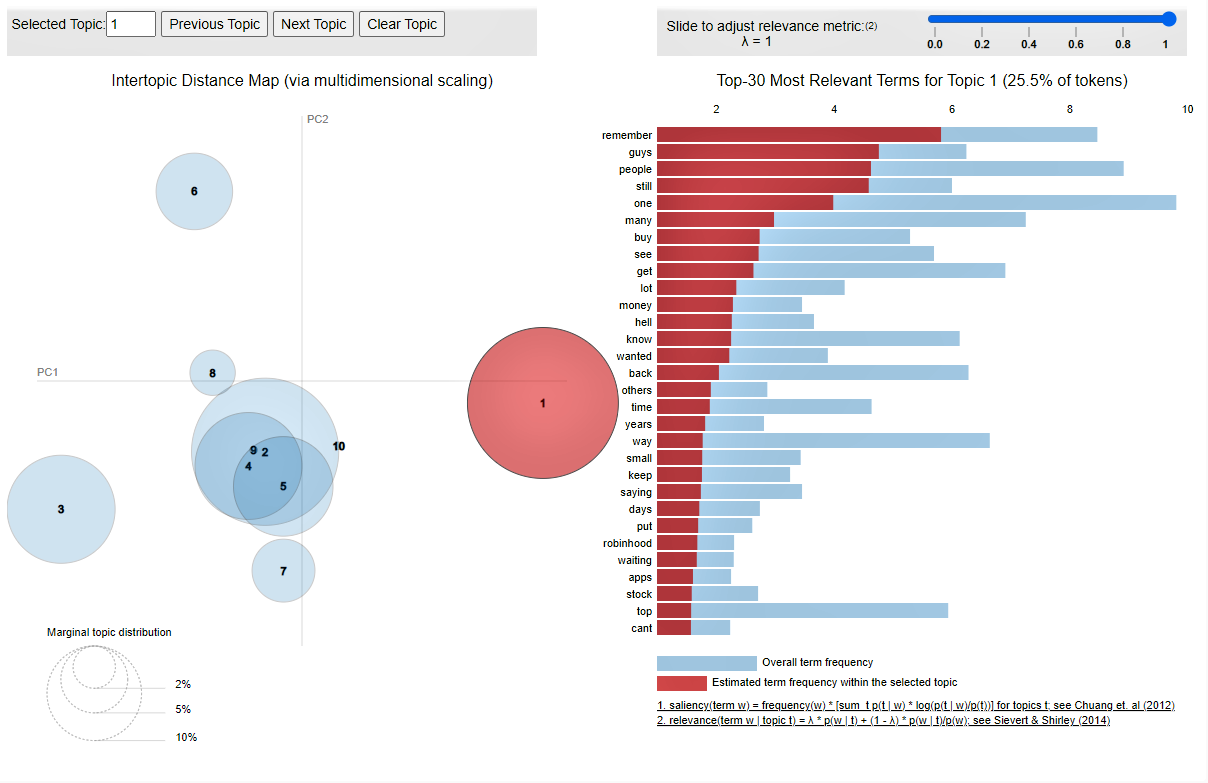